In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True,  # 지수 표기법 억제 (예: 1e-10 대신 0.0000000001로 표시)
                    precision=8)    # 소수점 이하 자리수를 8자리로 표현

# 데이터 준비

In [2]:
#hitter1 = pd.read_csv('2000_2001_hitter.csv')
#hitter2 = pd.read_csv('2002_2013_hitter.csv')
#hitter3 = pd.read_csv('2014_hitter.csv')

hitter1 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2000_2001_hitter.csv')
hitter2 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2002_2013_hitter.csv')
hitter3 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2014_hitter.csv')

print(f'hitter1 >>> {hitter1.shape}')
print(f'hitter2 >>> {hitter2.shape}')
print(f'hitter3 >>> {hitter3.shape}')

display(hitter1.head(3))
display(hitter2.head(3))
display(hitter3.head(3))

hitter1 >>> (89, 36)
hitter2 >>> (505, 39)
hitter3 >>> (55, 39)


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,OBP,SLG,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2000박종호,2000,1,박종호,현대,0.340,121,541,441,150,...,0.428023,0.489796,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804
1,2000김동주,2000,2,김동주,두산,0.339,127,539,469,159,...,0.413729,0.603412,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000
2,2000브리또,2000,3,브리또,SK,0.338,103,452,405,137,...,0.398664,0.533333,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,R,...,MH,RISP,PH-BA,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2002장성호,2002,1,장성호,KIA,0.343,133,586,481,82,...,48,0.365,0.0,0.178794,0.365904,1.047904,116.003072,9.104892,0.412689,106.706
1,2002마해영,2002,2,마해영,삼성,0.323,133,596,532,92,...,53,0.313,0.0,0.268797,0.359023,1.002674,120.662819,8.573411,0.413068,110.578
2,2002이승엽,2002,3,이승엽,삼성,0.323,133,617,511,123,...,47,0.331,0.0,0.365949,0.538160,1.267409,157.375689,11.770481,0.468948,136.108


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,R,...,MH,RISP,PH-BA,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2014서건창,2014,1,서건창,넥센,0.370,128,616,543,135,...,66,0.390,0.0,0.176796,0.342541,1.097222,139.001623,10.254218,0.424498,120.634
1,2014김태균,2014,2,김태균,한화,0.365,118,508,422,66,...,44,0.354,0.0,0.199052,0.360190,1.100694,110.631890,10.194748,0.441970,97.816
2,2014손아섭,2014,3,손아섭,롯데,0.362,122,570,483,105,...,54,0.336,0.0,0.175983,0.356108,1.106918,125.666667,10.603125,0.428663,110.456


In [3]:
# 데이터프레임 병합 
hitter_concat = pd.concat([hitter1, hitter2, hitter3], 
                          ignore_index=True) # 기존 인덱스 무시
hitter_concat.tail()

,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,TA,RC,RC/27,wOBA,XR,R,SAC,MH,RISP,PH-BA
644,2014이범호,2014,51,이범호,KIA,0.269,105,406,350,94,...,0.884328,64.894286,6.441712,0.369291,63.468,47.0,0.0,24.0,0.293,0.000
645,2014모창민,2014,52,모창민,NC,0.263,122,468,419,110,...,0.676647,53.028291,4.138046,0.319970,55.644,62.0,8.0,22.0,0.263,0.667
646,2014오지환,2014,53,오지환,LG,0.262,113,464,397,104,...,0.818182,64.147759,5.463689,0.336344,63.404,72.0,6.0,21.0,0.359,0.000
647,2014조동화,2014,54,조동화,SK,0.262,125,522,443,116,...,0.539359,48.898621,3.520701,0.293759,48.544,74.0,28.0,26.0,0.328,0.143
648,2014김재호,2014,55,김재호,두산,0.252,122,421,341,86,...,0.620818,41.969406,3.867488,0.304498,44.468,50.0,13.0,21.0,0.298,0.000


In [4]:
# 변수 선택
X = hitter_concat[['OPS','ISO','SECA','TA','RC','RC/27','wOBA','XR']]
y = hitter_concat['YrPlayer']

print(X.shape, y.shape)
display(X.head())
display(y.head())


(649, 8) (649,)


,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804
1,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000
2,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820
3,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594
4,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284


0     2000박종호 
1     2000김동주 
2     2000브리또 
3     2000송지만 
4    2000데이비스 
Name: YrPlayer, dtype: object

<Axes: >

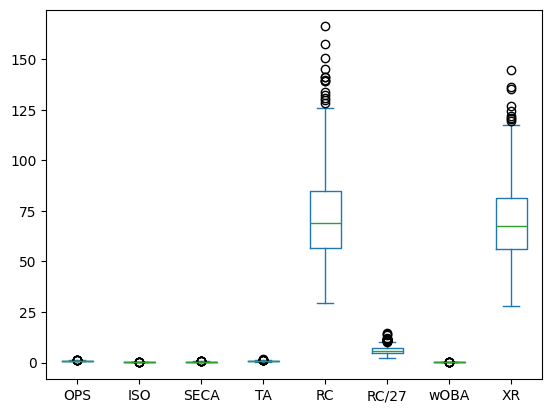

In [5]:
# 데이터 분포 확인
X.plot(kind='box')

In [6]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X.loc[:,:] = scaler.fit_transform(X)
X.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133


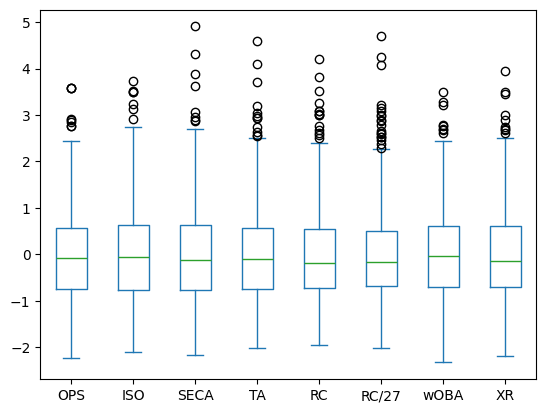

In [7]:
X.plot(kind='box');

# k-means clustering

### 최적의 k 찾기

In [8]:
# 엘보우 기법으로 최적의 k 찾기

from sklearn.cluster import KMeans  # 필요한 라이브러리를 가져옵니다.

# inertia_: 각 데이터 포인트와 그 데이터가 속한 군집의 중심점 사이의 거리 제곱합
inertia = []  # 빈 리스트를 생성

for i in range(2, 7):  # i를 사용하여 클러스터 수를 지정
    km = KMeans(n_clusters=i)  # KMeans 객체를 생성
    km.fit(X)  # 모델을 데이터에 맞춤
    print(km.inertia_)  # 각 클러스터 수에 대한 관성 값을 출력
    inertia.append(km.inertia_)  # 관성 값을 리스트에 추가

print(inertia)  # 모든 관성 값을 출력

2225.7814969700885
1335.0210472574988
1025.1618326319185
853.3952562399057
738.152665444155
[2225.7814969700885, 1335.0210472574988, 1025.1618326319185, 853.3952562399057, 738.152665444155]


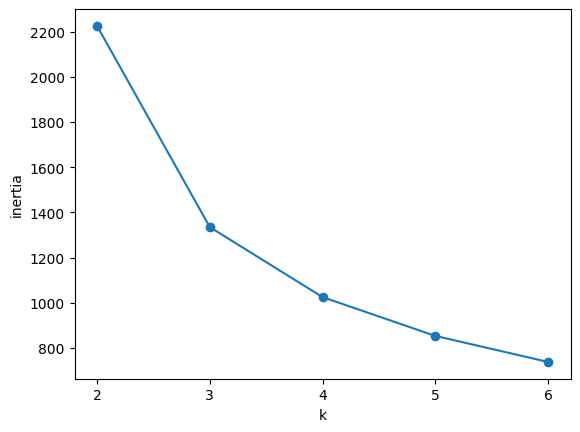

In [9]:
plt.plot(range(2,7), inertia, marker='o')  # k값(2부터 6까지)에 따른 inertia를 선그래프로 그림, 마커는 원형('o')으로 설정
plt.xticks(range(2,7))  # x축 눈금을 2부터 6까지 설정
plt.xlabel('k')  # x축 라벨을 'k'로 설정
plt.ylabel('inertia')  # y축 라벨을 'inertia'로 설정
plt.show()  # 그래프를 화면에 표시

### 군집화

실루엣 점수 : 0.3686437769255018


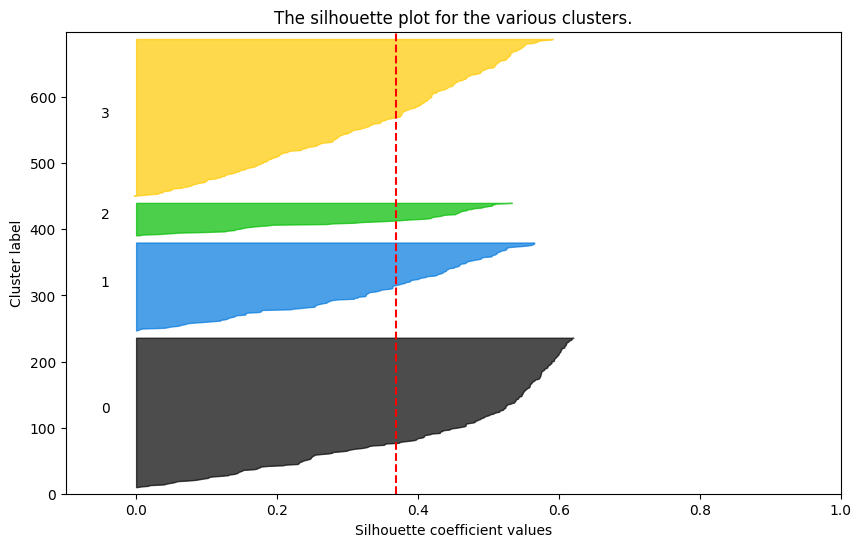

In [37]:
k = 4  # 클러스터 수 = 4
from sklearn.cluster import KMeans
km = KMeans(n_clusters=k, random_state=10)  # KMeans 객체를 생성
kmeans_cluster = km.fit_predict(X)  # KMeans를 사용하여 클러스터링을 수행하고 결과 저장

# 실루엣 점수
from sklearn.metrics import silhouette_score  # 실루엣 점수 계산 함수.
print(f'실루엣 점수 : {silhouette_score(X, kmeans_cluster)}')  # 실루엣 점수를 계산하고 출력

# 실루엣 시각화
from silhouette_analysis import silhouette_plot as s  # 실루엣 플롯 함수 지정
s(X, k)  # k에 대한 실루엣 플롯을 생성

### 군집화 결과 분석

In [38]:
# 데이터프레임 생성
df = pd.DataFrame(X, columns=X.columns)
df['kmeans_cluster'] = kmeans_cluster
df.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,1
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,2
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,1
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235,2
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133,1


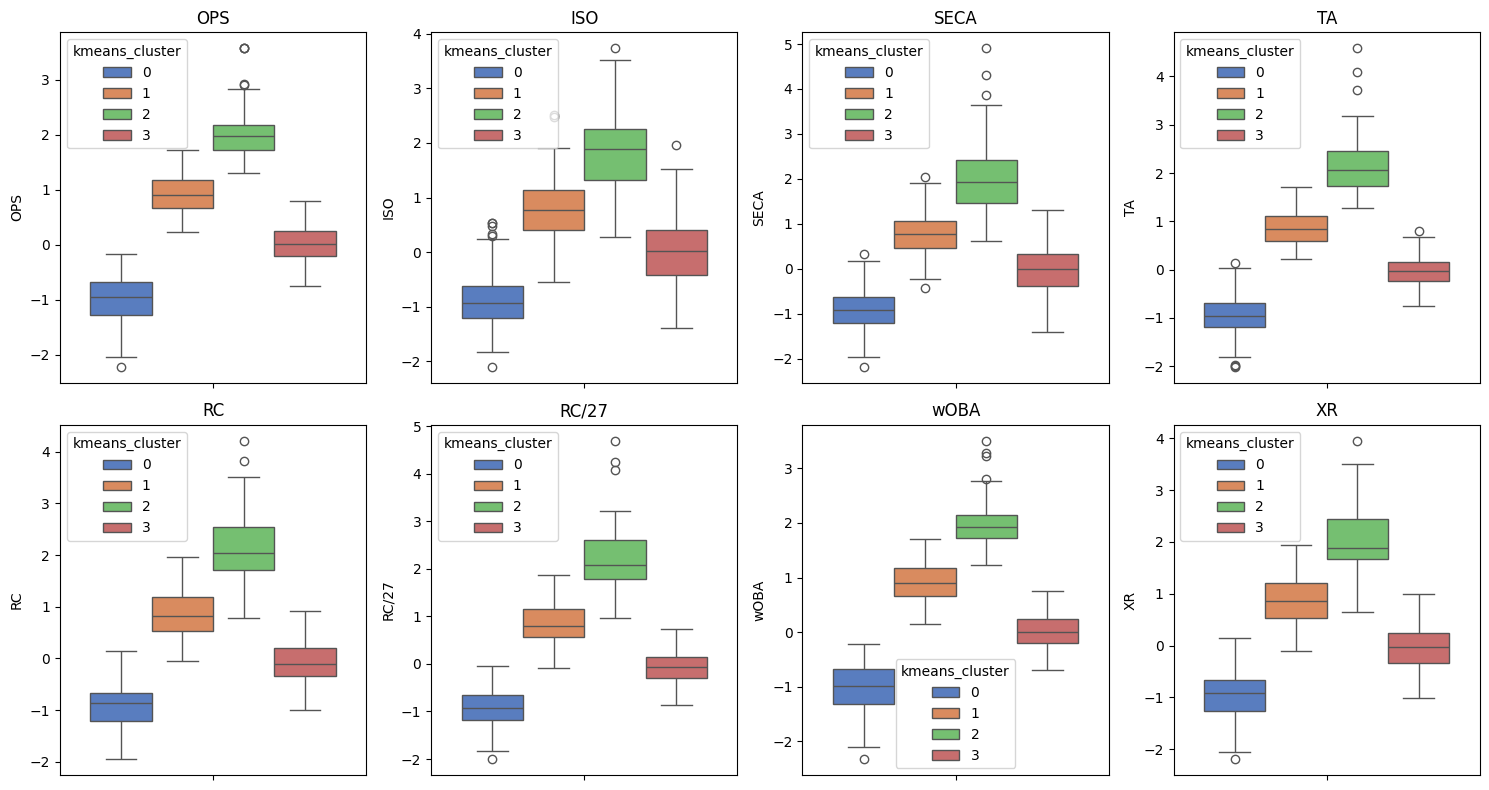

In [26]:
# 군집의 데이터 특징 분석
cols = df.columns[:-1]  # 마지막 컬럼을 제외한 모든 컬럼을 선택합니다.

plt.figure(figsize=(15, 8))  # 그래프의 크기를 설정합니다.
for i, col in enumerate(cols, 1):
    plt.subplot(2,4,i)  # 2행 4열의 서브플롯에서 인덱스 i에 플롯을 생성합니다.
    sns.boxplot(data=df, y=col, hue='kmeans_cluster', palette='muted')  # 각 특성에 대한 상자 그림을 생성합니다.
    plt.title(col)
plt.tight_layout()  # 서브플롯 간의 레이아웃을 조정합니다.


In [27]:
# 개별 데이터 실루엣 계수 컬럼 추가
from sklearn.metrics import silhouette_samples  # 실루엣 샘플 점수를 위한 모듈 임포트
df['silhouette'] = silhouette_samples(X, kmeans_cluster)  # 데이터 X와 클러스터 결과를 사용하여 실루엣 점수를 계산하고 'silhouette' 열에 추가
df.head()  # 데이터프레임의 처음 몇

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,1,0.433784
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,2,0.278949
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,1,0.365366
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235,2,0.469111
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133,1,0.430869


In [28]:
df['player'] = y  # 'player' 열에 y 데이터를 할당

max_idx = df.groupby('kmeans_cluster')['silhouette'].idxmax()  # 각 클러스터 내에서 실루엣 값이 최대인 인덱스를 찾음
df.loc[max_idx,['player','kmeans_cluster']]  # 최대 실루엣 값을 가진 플레이어와 클러스터 결과를 출력

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette
106,-0.487238,-0.525068,-0.672578,-0.639331,-0.228069,-0.50102,-0.465956,-0.251185,3,-0.003318


In [29]:
# 클러스터 별 중심 player
df['player'] = y

max_idx = df.groupby('kmeans_cluster')['silhouette'].idxmax()
df.loc[max_idx,['player','kmeans_cluster']]

,player,kmeans_cluster
325,2007김민재,0
475,2011최정,1
553,2013박병호,2
192,2004박진만,3


In [30]:
df['rank'] = df.groupby('kmeans_cluster')['silhouette'].rank()  # 각 클러스터 내에서 실루엣 값을 기준으로 랭크 계산
df.loc[df['rank']<=3]  # 랭크가 3 이하인 데이터 선택

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette,player,rank
106,-0.487238,-0.525068,-0.672578,-0.639331,-0.228069,-0.501020,-0.465956,-0.251185,3,-0.003318,2002강동우,1.0
247,-0.579964,0.092560,-0.508001,-0.753638,-0.284957,-0.712661,-0.727330,-0.332497,0,0.007008,2005라이온,2.0
308,1.497092,1.128243,1.968384,1.604595,1.494498,1.449024,1.476601,1.569007,2,0.008110,2007브룸바,2.0
345,0.300930,-0.277513,-0.126136,0.667886,0.810153,0.672225,0.298565,0.896256,1,0.003524,2008조성환,2.0
356,-0.765416,-1.561188,-0.425195,-0.159304,-0.058171,-0.215734,-0.657398,0.002138,0,0.017471,2008이종욱,3.0
414,0.421473,1.134192,0.659796,0.245733,0.328596,0.103963,0.330268,0.391614,1,0.000078,2009박정권,1.0
463,0.384383,1.525750,0.803392,0.113496,0.231924,-0.176452,0.302820,0.398997,3,0.019589,2010최진행,3.0
508,-0.431603,-1.116144,-1.325089,-0.603810,0.144438,-0.229039,-0.428757,0.145146,0,0.001266,2012손아섭,1.0
522,1.311640,1.777687,1.864598,1.434561,1.643943,1.212194,1.238435,1.759474,2,0.004794,2012박병호,1.0
612,0.467836,-0.002966,-0.117825,0.283424,0.836296,0.462494,0.527210,0.821377,1,0.004712,2014황재균,3.0


# 주성분분석

In [31]:
# 모든 특성(컬럼)에 대해 주성분 계산하여 각 데이터포인트를 주성분 공간으로 변환
from sklearn.decomposition import PCA  # PCA 모듈 임포트
pca = PCA()  # PCA 객체 생성 (기본 설정)
principal_components = pca.fit_transform(X)  # 데이터 X에 PCA 적용하여 주성분 생성
principal_components  # 주성분 출력

array([[ 2.48864775, -1.29871071, -0.18369185, ...,  0.11512947,
        -0.05012084, -0.00542238],
       [ 4.8638416 , -0.32843484,  0.04378699, ...,  0.02815584,
        -0.05298553,  0.00816747],
       [ 2.05850718, -0.4397998 , -0.79470761, ...,  0.02887054,
        -0.04552095, -0.02742987],
       ...,
       [-0.3971905 ,  0.69084294,  0.14211226, ...,  0.09606087,
        -0.0169874 ,  0.04994242],
       [-3.94087277, -0.42488303,  0.27501545, ..., -0.11415355,
         0.00769498,  0.00666951],
       [-3.33227219,  0.22550401, -0.14325161, ..., -0.0513692 ,
         0.01871363, -0.02078552]], shape=(649, 8))

In [32]:
# 컬럼별 설명된 분산 비율 확인
pca.explained_variance_ratio_

array([0.90514573, 0.05062617, 0.02188854, 0.0184561 , 0.00299299,
       0.00055624, 0.00018392, 0.00015031])

In [33]:
# 누적분산 확인
pca.explained_variance_ratio_.cumsum() # 누적 분산 비율 계산 및 출력

array([0.90514573, 0.95577189, 0.97766044, 0.99611654, 0.99910953,
       0.99966577, 0.99984969, 1.        ])

In [34]:
# 2개의 주성분으로 차원 축소
from sklearn.decomposition import PCA  # PCA 모듈 임포트
pca = PCA(n_components=2)  # 2개의 주성분으로 PCA 객체 생성
principal_components = pca.fit_transform(X)  # 데이터 X에 PCA 적용하여 주성분 생성
principal_components  # 주성분 출력

array([[ 2.48864775, -1.29871071],
       [ 4.8638416 , -0.32843484],
       [ 2.05850718, -0.4397998 ],
       ...,
       [-0.3971905 ,  0.69084294],
       [-3.94087277, -0.42488303],
       [-3.33227219,  0.22550401]], shape=(649, 2))

실루엣 점수 : 0.43183378066194306


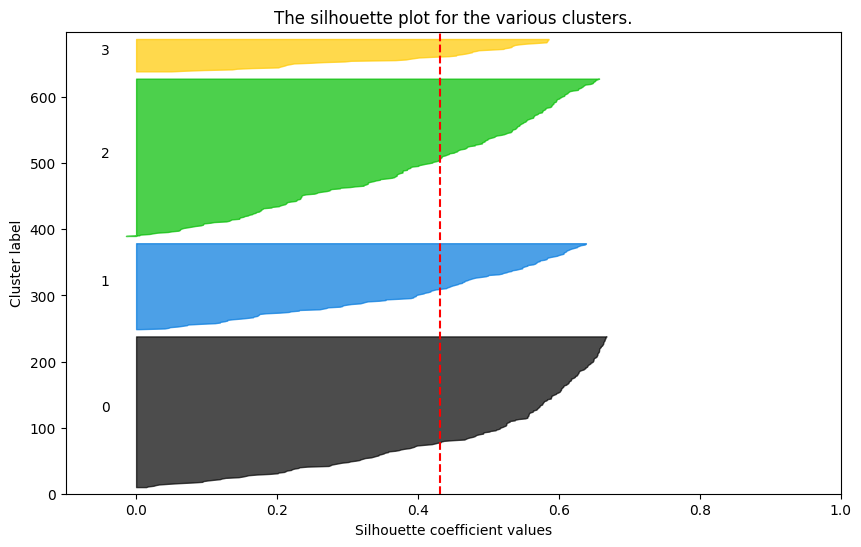

In [35]:
# 주성분으로 군집화
k = 4  # 클러스터 수 = 4
from sklearn.cluster import KMeans
KMeans(n_clusters=k, random_state=10)  # KMeans 객체를 생성
kmeans_cluster = km.fit_predict(principal_components)  # KMeans를 사용하여 클러스터링을 수행하고 결과 저장

# 실루엣 점수
from sklearn.metrics import silhouette_score  # 실루엣 점수 계산 함수.
print(f'실루엣 점수 : {silhouette_score(principal_components, kmeans_cluster)}')  # 실루엣 점수를 계산하고 출력

# 실루엣 시각화
from silhouette_analysis import silhouette_plot as s  # 실루엣 플롯 함수 지정
s(principal_components, k)  # k에 대한 실루엣 플롯을 생성


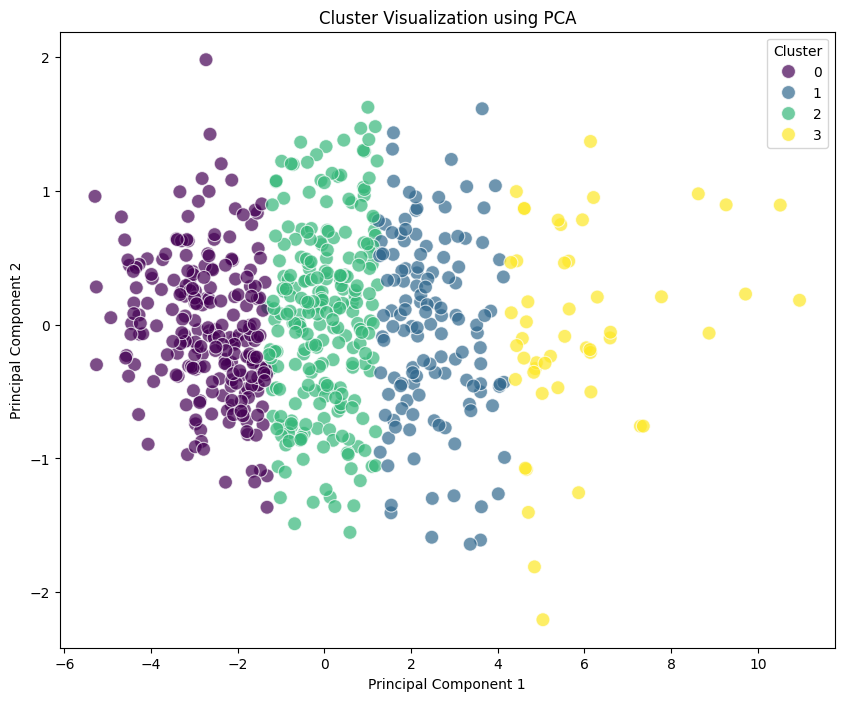

In [36]:
# 주성분 분석(PCA) 수행
pca = PCA(n_components=2)  # 2개의 주성분으로 데이터 축소
principal_components = pca.fit_transform(X)  # 데이터에 PCA 적용

# 데이터프레임 생성 (주성분)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])  # 주성분 데이터프레임 생성
pca_df['kmeans_cluster'] = kmeans_cluster  # 클러스터 결과를 데이터프레임에 추가

# 군집 결과 시각화
plt.figure(figsize=(10, 8))  # 그래프 크기 설정
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='kmeans_cluster', palette='viridis', s=100, alpha=0.7, edgecolor='w')  # 산점도 그리기
plt.title('Cluster Visualization using PCA')  # 제목 설정
plt.xlabel('Principal Component 1')  # x축 라벨 설정
plt.ylabel('Principal Component 2')  # y축 라벨 설정
plt.legend(title='Cluster')  # 범례 설정
plt.show()  # 그래프 표시

# PCA를 하거나 하지 않은 경우 군집 결과 비교